In [31]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [5]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [7]:
df = df.drop(['contact','day','month','duration','education'] , axis = 1)

In [8]:
df.head(1)

,age,job,marital,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,40,4,1,0,3036,1,0,0,0,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [9]:
df.isnull().sum()

age         0
job         0
marital     0
default     0
balance     0
housing     0
loan        0
campaign    0
pdays       0
previous    0
poutcome    0
y           0
dtype: int64

In [10]:
df.dtypes

age         int64
job         int64
marital     int64
default     int64
balance     int64
housing     int64
loan        int64
campaign    int64
pdays       int64
previous    int64
poutcome    int64
y           int64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,22.936055,10.618004,0.0,15.0,21.0,30.0,76.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1963.307469,1463.533246,0.0,988.0,1364.0,2344.0,7167.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
campaign,45211.0,1.762381,3.075904,0.0,0.0,1.0,2.0,47.0
pdays,45211.0,40.154188,96.917547,0.0,0.0,0.0,0.0,558.0
previous,45211.0,0.573356,1.877700,0.0,0.0,0.0,0.0,40.0


In [12]:
df["marital"] = df["marital"].astype("category")
df["default"] = df["default"].astype("category")
df["housing"] = df["housing"].astype("category")
df["loan"] = df["loan"].astype("category")

In [13]:
df.dtypes

age            int64
job            int64
marital     category
default     category
balance        int64
housing     category
loan        category
campaign       int64
pdays          int64
previous       int64
poutcome       int64
y              int64
dtype: object

In [14]:
X = df.drop('y' , axis = 1)
Y = df['y']

In [15]:
X.head(1)

,age,job,marital,default,balance,housing,loan,campaign,pdays,previous,poutcome
0,40,4,1,0,3036,1,0,0,0,0,3


In [16]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [17]:
X = pd.get_dummies(X)

In [18]:
X.head()

,age,job,balance,campaign,pdays,previous,poutcome,marital_0,marital_1,marital_2,default_0,default_1,housing_0,housing_1,loan_0,loan_1
0,40,4,3036,0,0,0,3,False,True,False,True,False,False,True,True,False
1,26,9,945,0,0,0,3,False,False,True,True,False,False,True,True,False
2,15,2,918,0,0,0,3,False,True,False,True,False,False,True,False,True
3,29,1,2420,0,0,0,3,False,True,False,True,False,False,True,True,False
4,15,11,917,0,0,0,3,False,False,True,True,False,True,False,True,False


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit_transform(X)

array([[0.52631579, 0.36363636, 0.4236082 , ..., 1.        , 1.        ,
        0.        ],
       [0.34210526, 0.81818182, 0.13185433, ..., 1.        , 1.        ,
        0.        ],
       [0.19736842, 0.18181818, 0.12808707, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.71052632, 0.45454545, 0.76112739, ..., 0.        , 1.        ,
        0.        ],
       [0.51315789, 0.09090909, 0.22101298, ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.18181818, 0.5272778 , ..., 0.        , 1.        ,
        0.        ]])

In [22]:
scaler_x = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)

In [23]:
scaler_x.head()

,age,job,balance,campaign,pdays,previous,poutcome,marital_0,marital_1,marital_2,default_0,default_1,housing_0,housing_1,loan_0,loan_1
0,0.526316,0.363636,0.423608,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.342105,0.818182,0.131854,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.197368,0.181818,0.128087,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.381579,0.090909,0.337659,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.197368,1.000000,0.127948,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
input_train,input_test,output_train,output_test = train_test_split(scaler_x,Y,test_size=0.3, random_state=1)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
KNN = KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [28]:
knn = KNN.fit(input_train,output_train)
knn

KNeighborsClassifier()

In [29]:
pred_test = knn.predict(input_test)
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
output_test

3610     0
11677    0
33018    0
44323    1
8119     0
        ..
10811    0
28752    0
22657    0
12529    0
44850    1
Name: y, Length: 13564, dtype: int64

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [33]:
cf_matrix = confusion_matrix(output_test,pred_test)
cf_matrix

array([[11689,   324],
       [ 1250,   301]], dtype=int64)

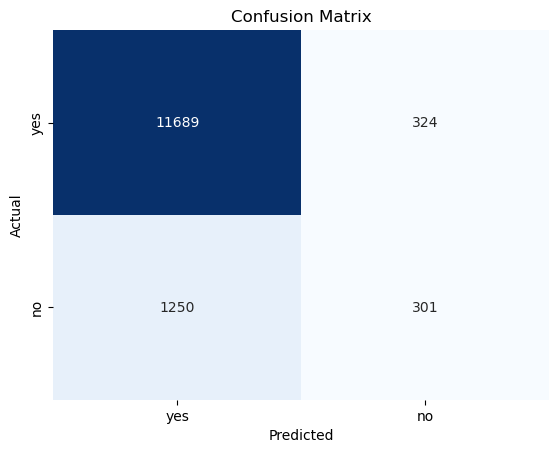

In [54]:
ax = sns.heatmap(data = cf_matrix , annot = True , fmt = 'd' , cmap = 'Blues',cbar = False)
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['yes','no'])
ax.yaxis.set_ticklabels(['yes','no'])
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

In [42]:
ac_score = round(accuracy_score(output_test,pred_test)*100,2)

In [43]:
ac_score

88.4

In [45]:
print(classification_report(output_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     12013
           1       0.48      0.19      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.69      0.58      0.61     13564
weighted avg       0.86      0.88      0.86     13564



In [55]:
recall_yes = 11689/(11689 +324)
print("recall_yes  :" ,recall_yes)
recall_no = 301/(301 + 1250)
print("recall_no  :", recall_no)

recall_yes  : 0.973029218346791
recall_no  : 0.19406834300451323


In [56]:
precision_yes = 11689/(11689 + 1250)
print("precision_yes   :",precision_yes)
precision_no = 301/(324+301)
print("precision_no  :" , precision_no)

precision_yes   : 0.9033928433418348
precision_no  : 0.4816
